# Imports

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial

# Specify site 
Input as one of following strings: 'HOMER_AP', 'HOMER_8NW', 'KENAI_MUNI_AP'

In [2]:
site = 'HOMER_AP'

# Read in data

In [3]:
if site == 'HOMER_AP':
    df = pd.read_csv('HAP.csv')
if site == 'HOMER_8NW':
    df = pd.read_csv('H8NW.csv')
if site == 'KENAI_MUNI_AP':
    df = pd.read_csv('KMAP.csv')

year = df['Year']
hgwt = df['HGWT']
gwt_45 = df['GWT_45']
gwt_60 = df['GWT_60']
gwt_85 = df['GWT_85']
hsat = df['HSAT']
sat_45 = df['SAT_45']
sat_60 = df['SAT_60']
sat_85 = df['SAT_85']
hp = df['HP']
p_45 = df['P_45']
p_60 = df['P_60']
p_85 = df['P_85']

# Note about data: values for 2020, 2030, 2040 in this file are computed based on historical observations
# Values for 2040 in 'predict_gwt_v1' file are computed based on climate model predictions

In [4]:
df.head()

,Year,HGWT,GWT_45,GWT_60,GWT_85,HSAT,SAT_45,SAT_60,SAT_85,HP,P_45,P_60,P_85
0,1970,4.666570,NaN,NaN,NaN,2.611111,NaN,NaN,NaN,594.037975,NaN,NaN,NaN
1,1980,4.505565,NaN,NaN,NaN,2.555556,NaN,NaN,NaN,604.494892,NaN,NaN,NaN
2,1990,4.468108,NaN,NaN,NaN,2.944444,NaN,NaN,NaN,644.028094,NaN,NaN,NaN
3,2000,4.552542,NaN,NaN,NaN,3.333333,NaN,NaN,NaN,645.087387,NaN,NaN,NaN
4,2010,4.732211,NaN,NaN,NaN,3.722222,NaN,NaN,NaN,616.369538,NaN,NaN,NaN


# Plot groundwater temperature predictions

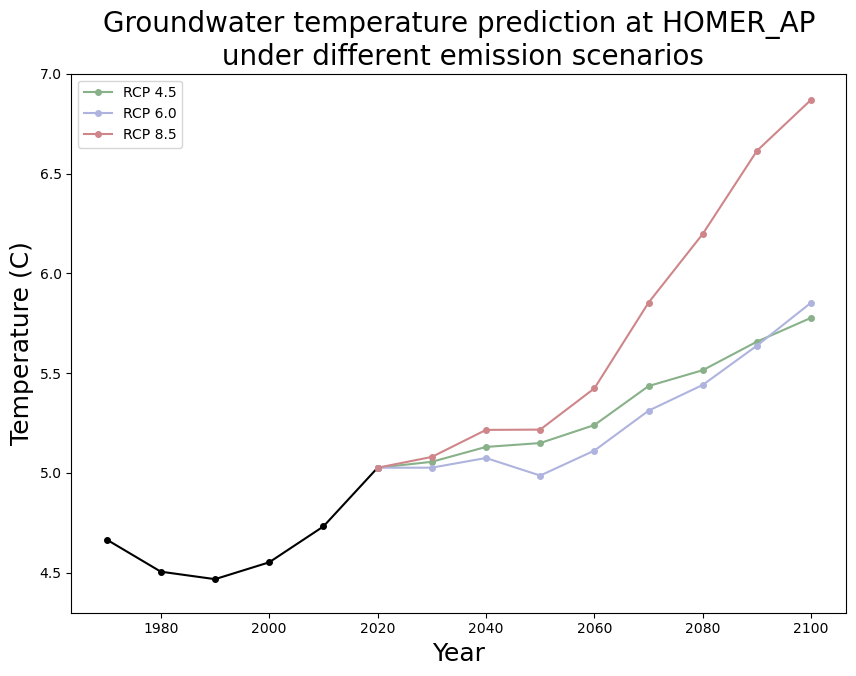

In [5]:
plt.figure(figsize = (10,7))

marker_size = 4

plt.plot(year, hgwt, marker="o", markersize=marker_size, color='black')
plt.plot(year, gwt_45, marker="o", markersize=marker_size, color='#88b189', label="RCP 4.5")
plt.plot(year, gwt_60, marker="o", markersize=marker_size, color='#aeb4dd', label="RCP 6.0")
plt.plot(year, gwt_85, marker="o", markersize=marker_size, color='#ce868a', label="RCP 8.5")

plt.title("Groundwater temperature prediction at "+site+"\n under different emission scenarios", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Temperature (C)", fontsize=18)
plt.ylim(4.3, 7)
plt.legend()

# Plot surface temperature

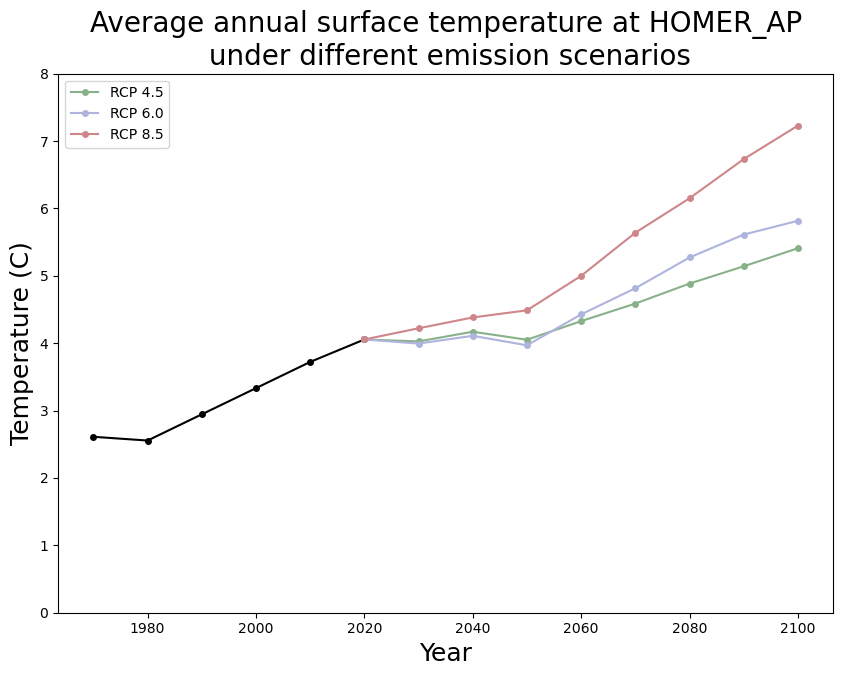

In [6]:
plt.figure(figsize=(10,7))

marker_size = 4

plt.plot(year, hsat, marker="o", markersize=marker_size, color='black')
plt.plot(year, sat_45, marker="o", markersize=marker_size, color='#88b189', label="RCP 4.5")
plt.plot(year, sat_60, marker="o", markersize=marker_size, color='#aeb4dd', label="RCP 6.0")
plt.plot(year, sat_85, marker="o", markersize=marker_size, color='#ce868a', label="RCP 8.5")

plt.title("Average annual surface temperature at "+ site +"\n under different emission scenarios", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Temperature (C)", fontsize=18)
plt.ylim(0, 8)
plt.legend()

# Plot precipitation

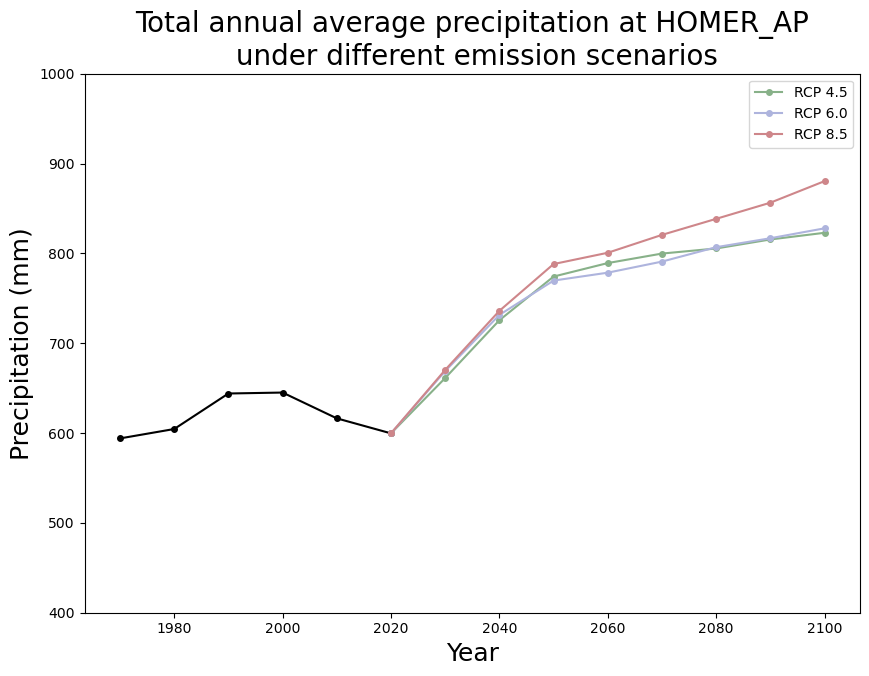

In [7]:
plt.figure(figsize=(10,7))

marker_size=4

plt.plot(year, hp, marker="o", markersize=marker_size, color='black')
plt.plot(year, p_45, marker="o", markersize=marker_size, color='#88b189', label="RCP 4.5")
plt.plot(year, p_60, marker="o", markersize=marker_size, color='#aeb4dd', label="RCP 6.0")
plt.plot(year, p_85, marker="o", markersize=marker_size, color='#ce868a', label="RCP 8.5")

plt.title("Total annual average precipitation at " + site +"\n under different emission scenarios", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Precipitation (mm)", fontsize=18)
plt.ylim(400, 1000)
plt.legend()

# Curve fitting for surface air temperature and precipitation
Code from the following resource: https://www.statology.org/curve-fitting-python/

In [8]:
# Calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

In [9]:
# Remove NaN values
sat = sat_45.dropna()
p = p_45.dropna()
gwt = gwt_45.dropna()

# Calculate models for surface temp (up to degree 4)
sat_model1 = np.poly1d(np.polyfit(sat, gwt, 1))
sat_model2 = np.poly1d(np.polyfit(sat, gwt, 2))
sat_model3 = np.poly1d(np.polyfit(sat, gwt, 3))
sat_model4 = np.poly1d(np.polyfit(sat, gwt, 4))

# Compute R^2 values for surface temp
sat_rsq1 = "%.2f" % adjR(sat, gwt, 1)['r_squared']
sat_rsq2 = "%.2f" % adjR(gwt, gwt, 2)['r_squared']
sat_rsq3 = "%.2f" % adjR(gwt, gwt, 3)['r_squared']
sat_rsq4 = "%.2f" % adjR(gwt, gwt, 4)['r_squared']

# Calculate models for precip (up to degree 4)
p_model1 = np.poly1d(np.polyfit(p, gwt, 1))
p_model2 = np.poly1d(np.polyfit(p, gwt, 2))
p_model3 = np.poly1d(np.polyfit(p, gwt, 3))
p_model4 = np.poly1d(np.polyfit(p, gwt, 4))

# Compute R^2 values for precip
p_rsq1 = "%.2f" % adjR(p, gwt, 1)['r_squared']
p_rsq2 = "%.2f" % adjR(p, gwt, 2)['r_squared']
p_rsq3 = "%.2f" % adjR(p, gwt, 3)['r_squared']
p_rsq4 = "%.2f" % adjR(p, gwt, 4)['r_squared']

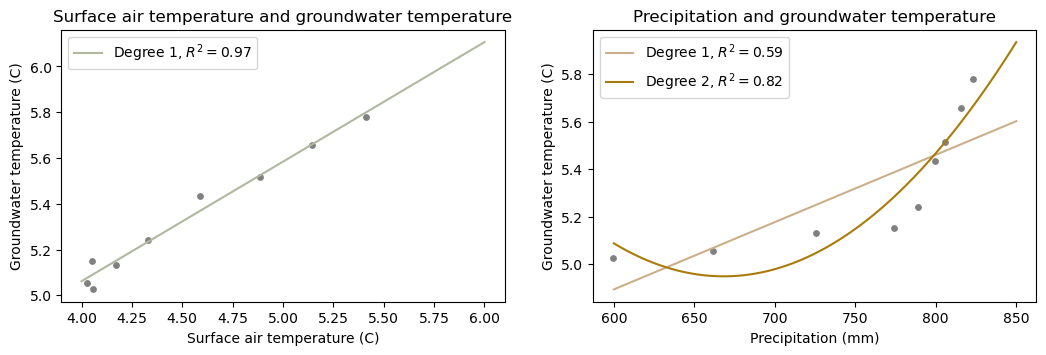

In [10]:
# Plot data
fig, ax = plt.subplots(1,2, figsize = (10, 4))
sat_poly = np.linspace(4, 6, 100)
p_poly = np.linspace(600, 850, 100)

ax[0].scatter(sat_45, gwt_45, s=15, color = "#808080")
ax[0].plot(sat_poly, sat_model1(sat_poly), color='#b0b8a0', label='Degree 1, $R^2 = $' + sat_rsq1)
ax[0].set_title('Surface air temperature and groundwater temperature')
ax[0].set_xlabel("Surface air temperature (C)")
ax[0].set_ylabel("Groundwater temperature (C)")
ax[0].legend()

ax[1].scatter(p_45, gwt_45, s=15, color = "#808080")
ax[1].plot(p_poly, p_model1(p_poly), color='#cbaf8a', label='Degree 1, $R^2 = $' + p_rsq1)
ax[1].plot(p_poly, p_model2(p_poly), color='#a97b0a', label='Degree 2, $R^2 = $' + p_rsq2)
ax[1].set_title('Precipitation and groundwater temperature')
ax[1].set_xlabel("Precipitation (mm)")
ax[1].set_ylabel("Groundwater temperature (C)")
ax[1].legend()

plt.subplots_adjust(bottom=0.2, right=1.1, hspace=0.8)